# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

## Zestaw zadań 2: Elementy statystyki opisowej 2 (Notatnik 2/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Poniższy kod wczytuje do zmiennej `recession_data_1` dane z przygotowanego wcześniej pliku recession_data_1.pkl.

In [3]:
recession_data_1 = pd.read_pickle('recession_data_1.pkl')
recession_data_1

,Country Name,Region Name,Income Group,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,,,
AFG,Afghanistan,Asia,Low,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355
ALB,Albania,Europe,Lower middle,5.902659,5.983260,7.500041,3.354289,3.706938,2.545406
DZA,Algeria,Africa,Upper middle,1.700000,3.400000,2.400000,1.600000,3.600000,2.900000
ASM,American Samoa,Oceania,Upper middle,-4.098361,1.851852,-2.657343,-4.166667,0.299850,0.000000
AND,Andorra,Europe,High,4.808689,1.553188,-5.559186,-5.302847,-1.974958,-0.008070
...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),Americas,High,3.504993,4.010594,1.218625,-6.594789,0.596383,-8.204246
PSE,West Bank and Gaza,Asia,Lower middle,-0.996556,3.788282,7.429182,8.593491,5.777362,9.600808
YEM,"Yemen, Rep.",Asia,Low,3.170409,3.338428,3.647569,3.866230,7.702307,-12.714897


### Zadnie 2: Prezentacja danych w formie tabelarycznej [10 pkt]

Przygotuj trzy tablice szeregów rodzielczych przedziałowych częstości wskaźnika GDP growth (annual %) dla poszczególnych lat.

Wyświetl przygotowane tablice w taki sposób aby zawarte w tablicy liczby (za wyjątkiem lat i granic przedziałów w nagłówkach kolumn i wierszy) wyświetlały się z dokładnością do 2 miejsca po przecinku.

#### a) Całość danych
Pierwsza tablica (`recession_table_1`) powinna zawierać szeregi skonstruowane w obarciu o całość danych.

 > Indeks: Year </br>
 > Wszystkie lata, dla których zostały wyznaczone wartości parametru GDP growth (annual %)
 
 > Kolumny: (-20, -15],	(-15, -10], ... , (30, 35] </br>
 > Kolejne przedziały wartości zdefiniowane jako `pandas.IntervalIndex`

In [4]:
cols = pd.interval_range(start=-20, end=35, freq=5)
recession_table_1 = pd.DataFrame()
for i in range(3,9):
    interval = pd.cut(recession_data_1.iloc[:, i], cols)
    col = pd.DataFrame(recession_data_1.iloc[:, i].groupby(interval, observed=False).size() / len(recession_data_1))
    recession_table_1 = pd.concat([recession_table_1, col.T])

recession_table_1.index.name = 'Year'
recession_table_1_display = recession_table_1.style.format('{:.02f}')
recession_table_1_display

,"(-20, -15]","(-15, -10]","(-10, -5]","(-5, 0]","(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]"
Year,,,,,,,,,,,
2006,0.00,0.00,0.01,0.08,0.36,0.47,0.07,0.01,0.00,0.01,0.01
2007,0.00,0.00,0.01,0.03,0.39,0.45,0.09,0.02,0.01,0.00,0.00
2008,0.01,0.01,0.03,0.13,0.45,0.32,0.05,0.01,0.00,0.00,0.00
2009,0.01,0.05,0.13,0.30,0.34,0.14,0.03,0.00,0.01,0.00,0.00
2010,0.00,0.00,0.03,0.09,0.45,0.36,0.06,0.01,0.01,0.01,0.00
2011,0.00,0.01,0.03,0.09,0.48,0.34,0.04,0.01,0.01,0.00,0.00


In [5]:
### Komórka testowa
# Kolumny
lower_boundaries = np.arange(-20, 35, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_1.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert recession_table_1.index.name == 'Year'
assert len(set(list(recession_table_1.index)) & set([2006, 2007, 2008, 2009, 2010, 2011])) == 6 \
    or len(set(list(recession_table_1.index)) & set(['2006', '2007', '2008', '2009', '2010', '2011'])) == 6
# Wartości w obrębie tablicy
assert recession_table_1.values.min() >= 0.0
assert recession_table_1.values.max() <= 1.0
assert np.all(np.isclose(np.array(recession_table_1.sum(axis=1).values, dtype=float), 1))

#### b) Podział na regiony geograficzne
Druga tablica (`recession_table_2`) powinna zawierać szeregi skonstruowane indywidualnie dla każdego z rejonów geograficznych.

 > Indeks: 2-poziomowe nagłówki </br>

 >> Nagłówki 1 poziomu: Region Name </br>
 >> Nazwy regionów geograficznych

 >> Nagłówki 2 poziomu: Year </br>
 >> Wszystkie lata, dla których zostały wyznaczone wartości parametru GDP growth (annual %) powtórzone dla każdego z rejonów

 > Kolumny: (-20, -15],	(-15, -10], ... , (30, 35] </br>
 > Kolejne przedziały wartości zdefiniowane jako `pandas.IntervalIndex`

In [6]:
# YOUR CODE HERE
cols = pd.interval_range(start=-20, end=35, freq=5)
recession_table_2 = pd.DataFrame()
regions = recession_data_1['Region Name'].unique()
for region in regions:
    region_df = recession_data_1[recession_data_1['Region Name'] == region]
    for i in range(3,9):
        interval = pd.cut(region_df.iloc[:, i], cols)
        col = pd.DataFrame(region_df.iloc[:, i].groupby(interval, observed=False).size() / len(region_df))
        recession_table_2 = pd.concat([recession_table_2, col.T])

indexes = pd.MultiIndex.from_product([regions, list(range(2006,2012))], names=['Region Name', 'Year'])
recession_table_2.index = indexes
recession_table_2_display = recession_table_2.style.format('{:.2f}')
recession_table_2_display

['Asia' 'Europe' 'Africa' 'Oceania' 'Americas']
Asia
Europe
Africa
Oceania
Americas


In [7]:
# Komórka testowa
# Kolumny
lower_boundaries = np.arange(-20, 35, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_2.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert recession_table_2.index.names == ['Region Name', 'Year']
assert set(list(recession_table_2.index.levels[0])) == set(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])
set(list(recession_table_2.index.levels[1]))
assert set(list(recession_table_2.index.levels[1])) == set([2006, 2007, 2008, 2009, 2010, 2011]) \
    or set(list(recession_table_2.index.levels[1])) == set(['2006', '2007', '2008', '2009', '2010', '2011'])
# # Wartości w obrębie tablicy
assert recession_table_2.values.min() >= 0.0
assert recession_table_2.values.max() <= 1.0
assert np.all(np.isclose(np.array(recession_table_2.sum(axis=1).values, dtype=float), 1))

#### c) Podział na stopnie zamożności

Trzecia tablica (`recession_table_3`) powinna zawierać szeregi skonstruowane indywidualnie dla każdego stopnia zamożności.

 > Indeks: 2-poziomowe nagłówki </br>

 >> Nagłówki 1 poziomu: Income Group </br>
 >> Nazwy klas ekonomicznych

 >> Nagłówki 2 poziomu: Year </br>
 >> Wszystkie lata, dla których zostały wyznaczone wartości parametru GDP growth (annual %) powtórzone dla każdej z grup ekonomicznych

 > Kolumny: (-20, -15],	(-15, -10], ... , (30, 35] </br>
 > Kolejne przedziały wartości zdefiniowane jako `pandas.IntervalIndex`

In [8]:
# YOUR CODE HERE
cols = pd.interval_range(start=-20, end=35, freq=5)
recession_table_3 = pd.DataFrame()
income_groups = recession_data_1['Income Group'].unique()
for income in income_groups:
    income_df = recession_data_1[recession_data_1['Income Group'] == income]
    for i in range(3,9):
        interval = pd.cut(income_df.iloc[:, i], cols)
        col = pd.DataFrame(income_df.iloc[:, i].groupby(interval, observed=False).size() / len(income_df))
        recession_table_3 = pd.concat([recession_table_3, col.T])

indexes = pd.MultiIndex.from_product([income_groups, list(range(2006,2012))], names=['Income Group', 'Year'])
recession_table_3.index = indexes
recession_table_3_display = recession_table_3.style.format('{:.2f}')
recession_table_3_display

In [9]:
# Komórka testowa
# Kolumny
lower_boundaries = np.arange(-20, 35, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_3.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert recession_table_3.index.names == ['Income Group', 'Year']
assert set(list(recession_table_3.index.levels[0])) == set(['High', 'Low', 'Lower middle', 'Upper middle'])
assert set(list(recession_table_3.index.levels[1])) == set([2006, 2007, 2008, 2009, 2010, 2011]) \
    or set(list(recession_table_3.index.levels[1])) == set(['2006', '2007', '2008', '2009', '2010', '2011'])
# Wartości w obrębie tablicy
assert recession_table_3.values.min() >= 0.0
assert recession_table_3.values.max() <= 1.0
assert np.all(np.isclose(np.array(recession_table_3.sum(axis=1).values, dtype=float), 1))

### Zadanie 3: Prezentacja danych w formie graficznej [25 pkt]

#### a) Diagramy częstości

Bazując na wczytanych do notatnika danych przygotuj diagramy częstości odpowiadające danym zawartym w przygotowanych wcześniej tabelach (podział na identyczne przedziały, skonstruowane w oparciu o całość danych oraz indywidualnie dla każdego z rejonów geograficznych i dla każdego stopnia zamożności, osobne diagramy dla poszczególnych lat). 

Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x5). W górnym wierszu zawrzyj diagram skonstruowany w oparciu o całość danych oraz cztery diagramy skonstruowane indywidualnie dla poszczególnych stopni zamożności, a w dolnym wierszu pięć dziagramów skonstruowanych indywidualnie dla poszczególnych rejonów geograficznych). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw identyczne zakresy wartości na odpowiadających sobie osiach wszystkich wykresów,
- ustaw różne od domyślnych i od siebie nawzajem kolory diagramów poszczególnych lat (kolory przyporządkowane poszczególnym latom powinny być identyczne na wszystkich wykresach),
- dodaj do figury lub wykresów legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym latom w taki sposób, aby nie zasłaniała/zasłaniały znajdujących się na wykresach danych.

Uwaga! Zadanie należy wykonać w oparciu o wczytane do notatnika szeregi szczegółowe, a nie w oparciu o szeregi rozdzielcze częstości przygotowane w zadaniu 2.

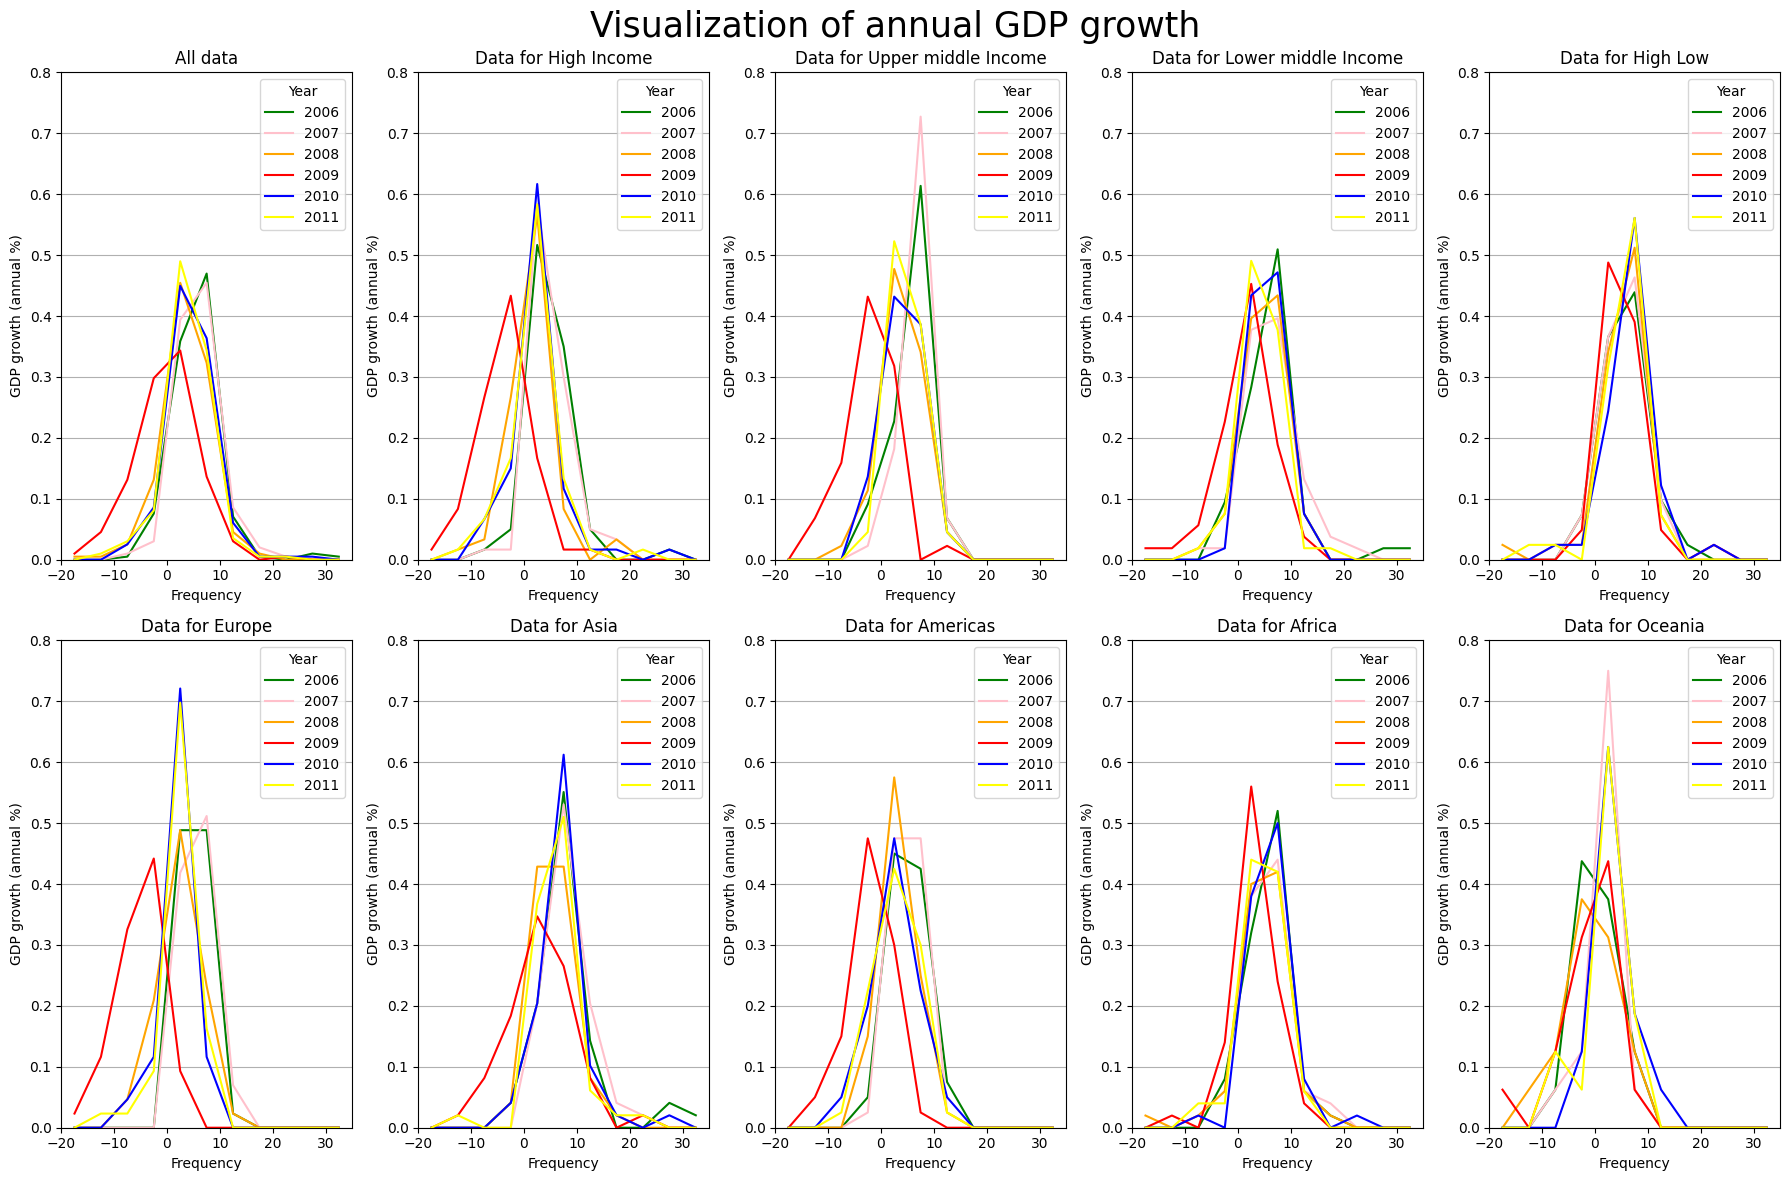

In [10]:
# YOUR CODE HERE
fig, ax = plt.subplots(2,5, figsize=(18,12), facecolor='white')
bins = np.arange(-20,40,5)
fig.suptitle('Visualization of annual GDP growth', size=25)

def pplot(data, ax, title):
    sns.histplot(data['2006'], ax=ax, label='2006', element='poly', fill=False, bins=bins, stat='probability', color='green')
    sns.histplot(data['2007'], ax=ax, label='2007', element='poly', fill=False, bins=bins, stat='probability', color='pink')
    sns.histplot(data['2008'], ax=ax, label='2008', element='poly', fill=False, bins=bins, stat='probability', color='orange')
    sns.histplot(data['2009'], ax=ax, label='2009', element='poly', fill=False, bins=bins, stat='probability', color='red')
    sns.histplot(data['2010'], ax=ax, label='2010', element='poly', fill=False, bins=bins, stat='probability', color='blue')
    sns.histplot(data['2011'], ax=ax, label='2011', element='poly', fill=False, bins=bins, stat='probability', color='yellow')
    ax.set_title(title)
    ax.set_ylabel('GDP growth (annual %)')
    ax.set_xlabel('Frequency')
    ax.set_xlim([-20, 35])
    ax.set_ylim([0, 0.8])
    ax.grid(True, axis='y')
    ax.legend(title='Year')
    
pplot(recession_data_1, ax[0][0], 'All data')

pplot(recession_data_1[recession_data_1['Income Group'] == 'Low'], ax[0][4], 'Data for High Low')
pplot(recession_data_1[recession_data_1['Income Group'] == 'Lower middle'], ax[0][3], 'Data for Lower middle Income')
pplot(recession_data_1[recession_data_1['Income Group'] == 'Upper middle'], ax[0][2], 'Data for Upper middle Income')
pplot(recession_data_1[recession_data_1['Income Group'] == 'High'], ax[0][1], 'Data for High Income')

pplot(recession_data_1[recession_data_1['Region Name'] == 'Europe'], ax[1][0], 'Data for Europe')
pplot(recession_data_1[recession_data_1['Region Name'] == 'Asia'], ax[1][1], 'Data for Asia')
pplot(recession_data_1[recession_data_1['Region Name'] == 'Americas'], ax[1][2], 'Data for Americas')
pplot(recession_data_1[recession_data_1['Region Name'] == 'Africa'], ax[1][3], 'Data for Africa')
pplot(recession_data_1[recession_data_1['Region Name'] == 'Oceania'], ax[1][4], 'Data for Oceania')

plt.tight_layout()
plt.show()

#### b) Inne typy wykresów
Bazując na wczytanych do notatnika danych przygotuj wykresy typu boxplot, violinplot, swarmplot i stripplot.

W przypadku każdego z typów wykresów zestaw wyniki na pojedynczej figurze (siatka wykresów 3x1). W górnym wierszu zawszyj wykres skonstruowany w oparciu o całość danych, w wierszu środkowym wykres zawierajacy podział na poszczególne stopnie zamożności, a w wierszu dolnym wykres zawierajacy podział na poszczególne rejony geograficzne. Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw identyczne zakresy wartości na odpowiadających sobie osiach wszystkich wykresów,
- na górnych wykresach dla całości danych użyj pojedynczego koloru jako wypełnienia,
- dla stopni zamożności ustaw jako wypełnienie skalę kolorów coolwarm,
- poszczególnym rejonom geograficznym przypisz jasne/wypłowiałe wersje kolorów przypisanych im na fladze olimpijskiej (Afryka szary, Europa jasnoniebieski itd.),
- w przypadku wykresów swarmplot i stripplot dobierz ich parametry tak by chmury punktów powiązanych z opisanymi w legendzie wariantami parametrów były rozdzielone,
- do dwóch dolnych wykresów dodaj legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym rejonom geograficznym/stopniom zamożności w taki sposób, aby nie zasłaniała znajdujących się na wykresach danych.

Wykresy pudełkowe powinny zawierać oznaczenia wartości średniej, mediany oraz wartości odstających.

Uwaga! Zadanie należy wykonać w oparciu o wczytane do notatnika szeregi szczegółowe, a nie w oparciu o szeregi rozdzielcze częstości przygotowane w zadaniu 2.

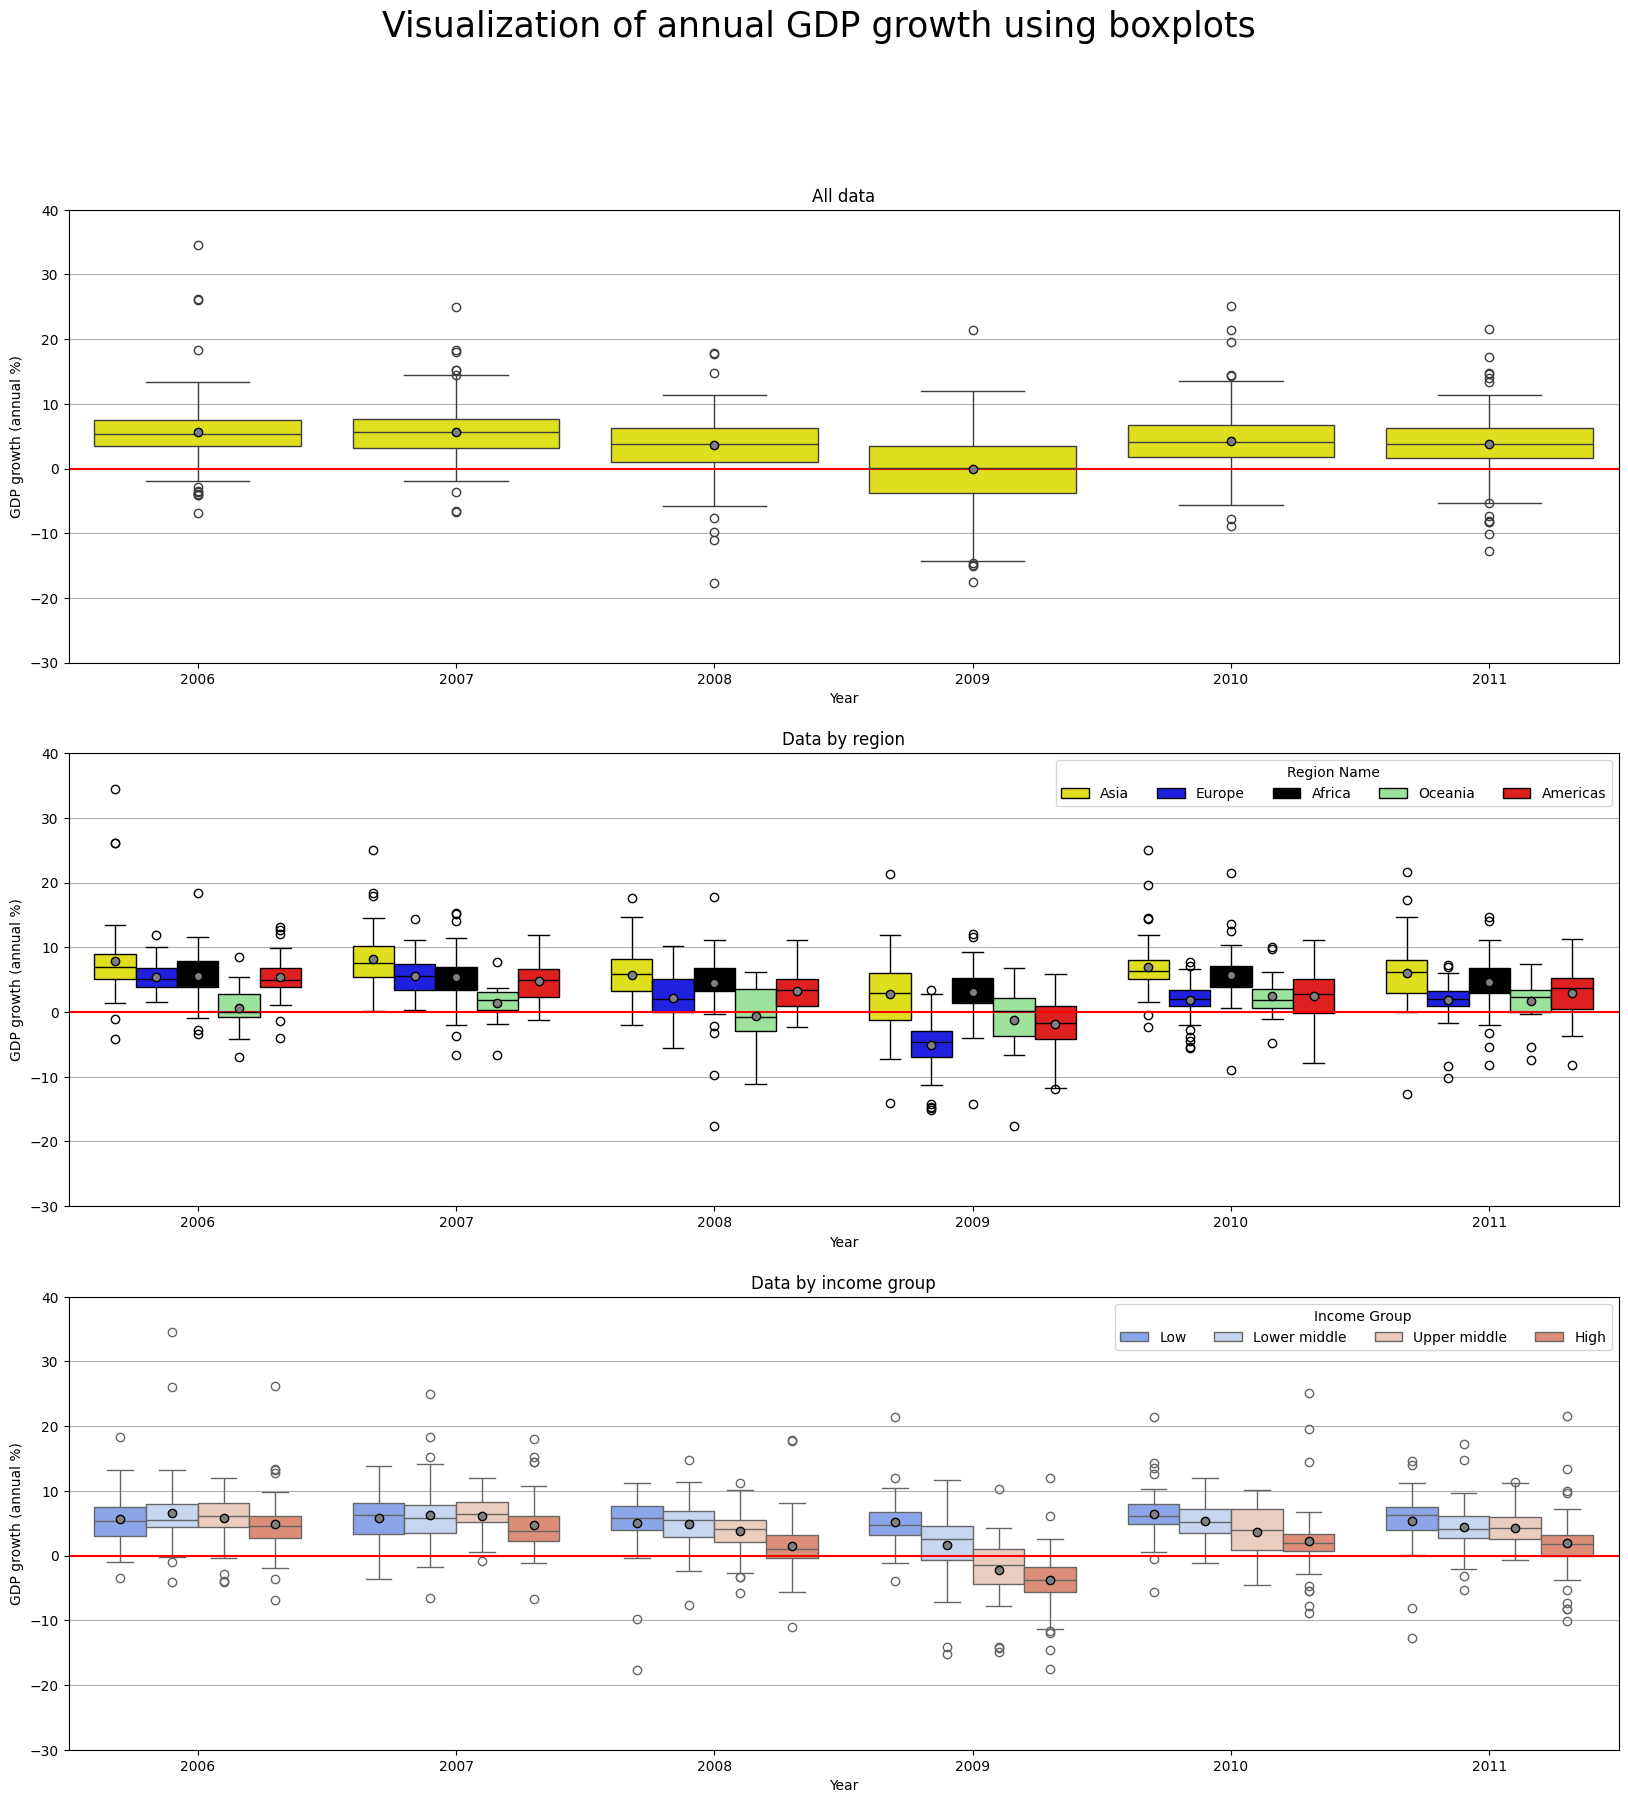

In [22]:
# Boxplot
fig, ax = plt.subplots(3, 1, figsize=(20,20), facecolor='white')
fig.suptitle('Visualization of annual GDP growth using boxplots', size=25)

sns.boxplot(data=recession_data_1, ax=ax[0], color='yellow', showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'gray',
                                                                                        'markeredgecolor': 'black'})
ax[0].grid(True, axis='y')
ax[0].set_ylim([-30, 40])
ax[0].set_title('All data')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GDP growth (annual %)')
ax[0].axhline(y=0, color='red')

melted_data = recession_data_1.melt(id_vars=['Region Name'], value_vars=recession_data_1.columns[3:], var_name='Year', value_name='GDP Growth')
sns.boxplot(data=melted_data, ax=ax[1], x='Year', y='GDP Growth', hue='Region Name', palette=['yellow', 'blue', 'black', 'lightgreen', 'red'],showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'gray',
                                                                                        'markeredgecolor': 'black'})
ax[1].grid(True, axis='y')
ax[1].set_ylim([-30, 40])
ax[1].set_title('Data by region')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('GDP growth (annual %)')
ax[1].axhline(y=0, color='red')
ax[1].legend(title='Region Name', ncols=5)

melted_data2 = recession_data_1.melt(id_vars=['Income Group'], value_vars=recession_data_1.columns[3:], var_name='Year', value_name='GDP Growth')
sns.boxplot(data=melted_data2, ax=ax[2], x='Year', y='GDP Growth', hue='Income Group', palette='coolwarm', showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'gray',
                                                                                        'markeredgecolor': 'black'})
ax[2].grid(True, axis='y')
ax[2].set_ylim([-30, 40])
ax[2].set_title('Data by income group')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('GDP growth (annual %)')
ax[2].axhline(y=0, color='red')
ax[2].legend(title='Income Group', ncols=4)

plt.tight_layout
plt.show()

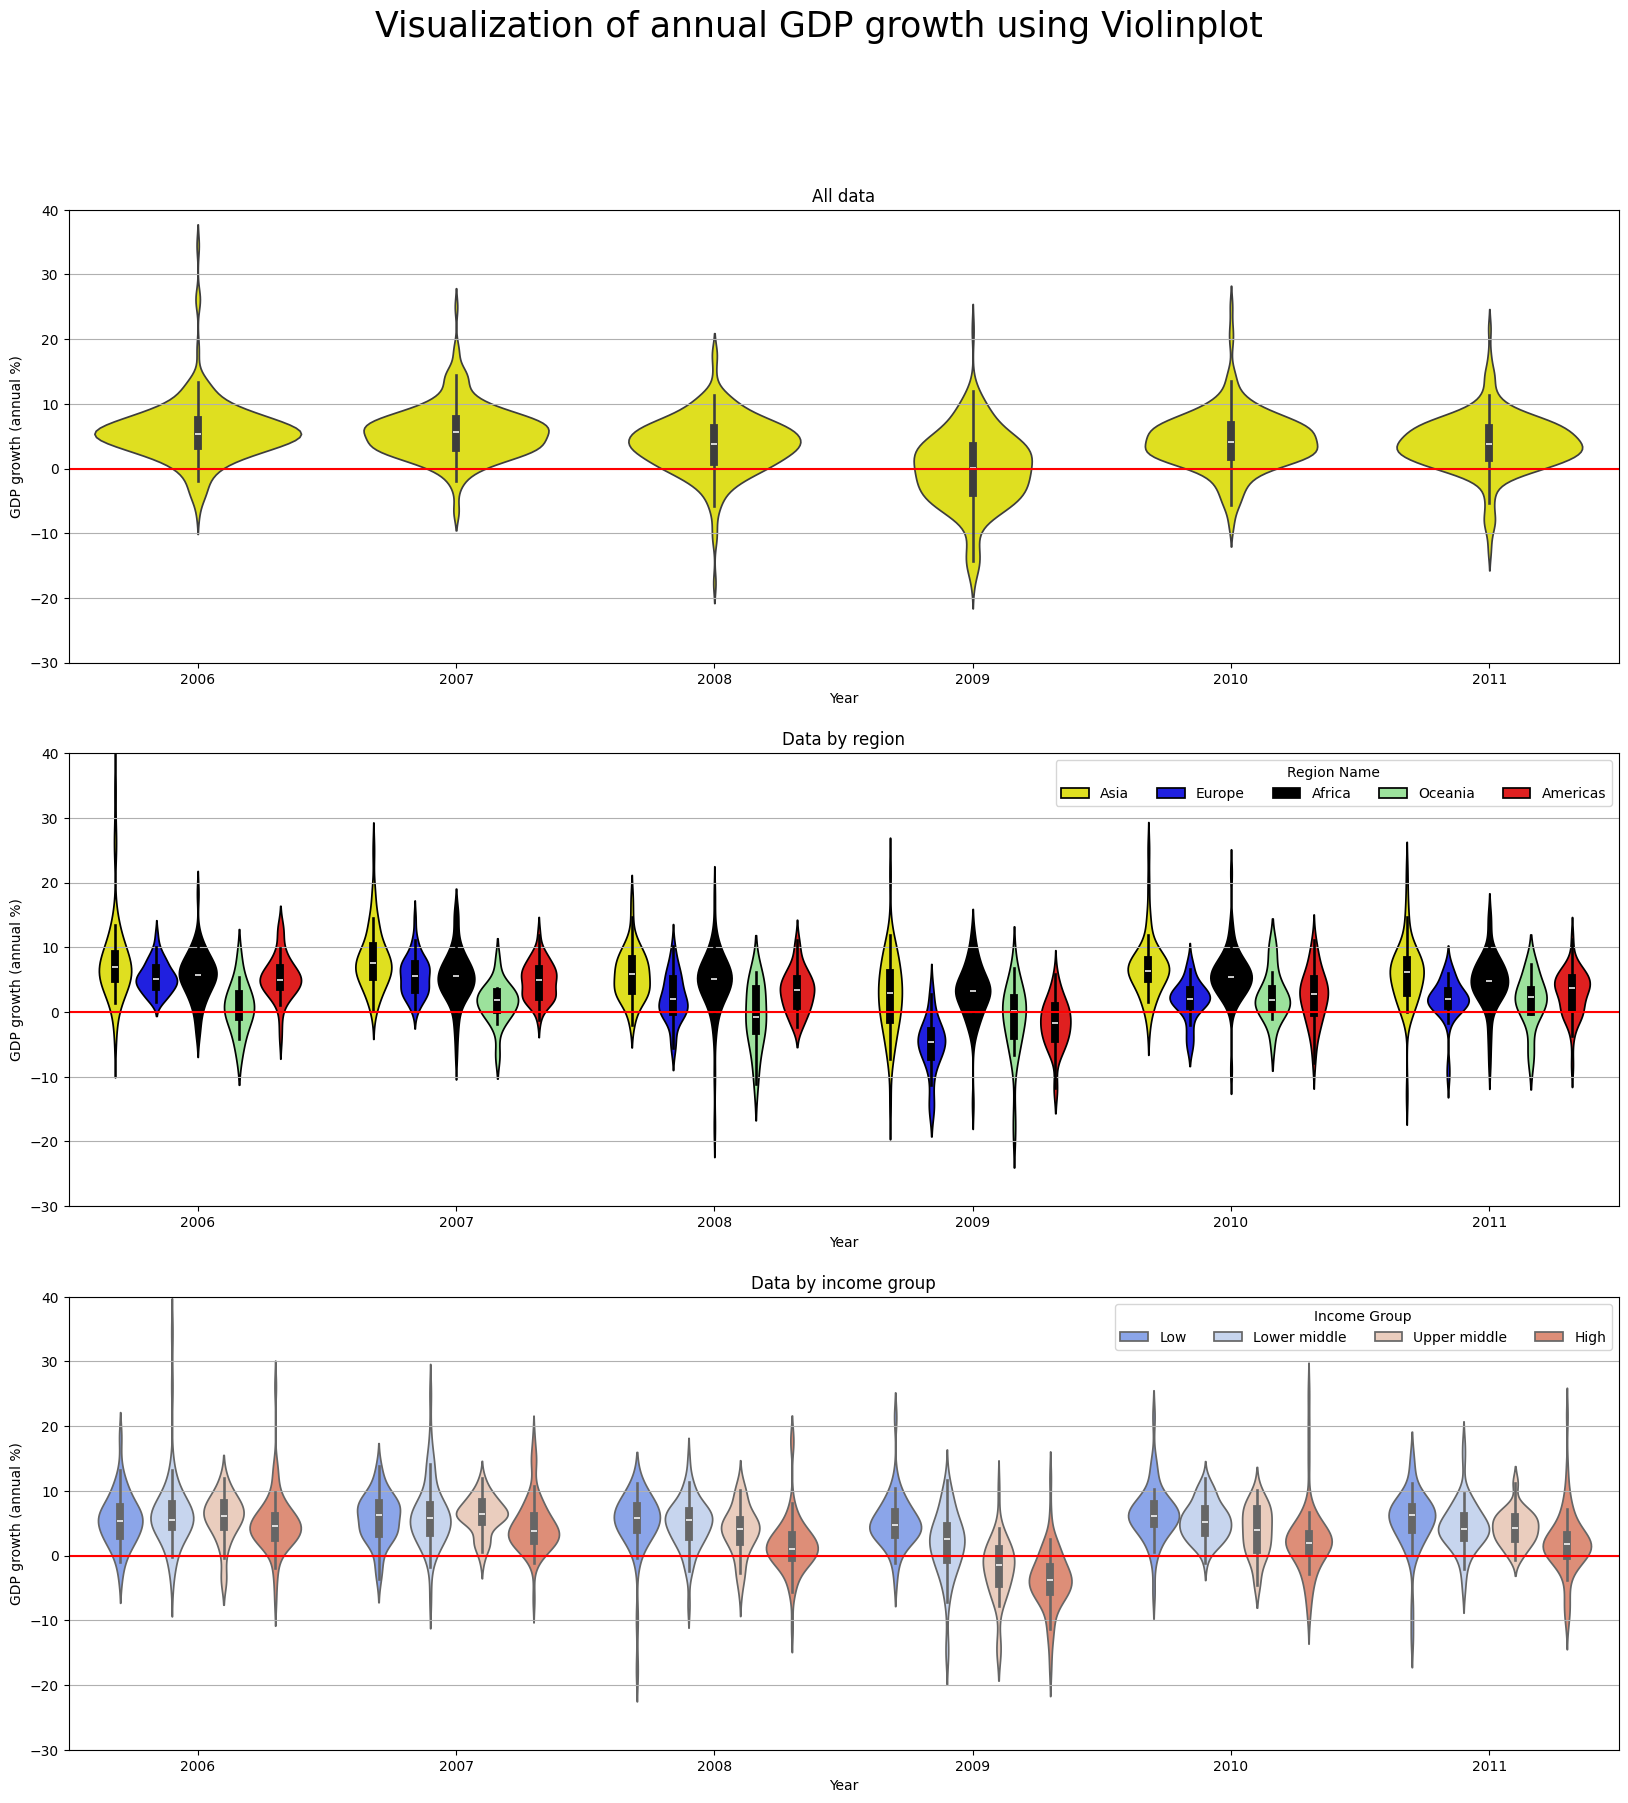

In [24]:
# Violinplot
fig, ax = plt.subplots(3, 1, figsize=(20,20), facecolor='white')
fig.suptitle('Visualization of annual GDP growth using Violinplot', size=25)

sns.violinplot(data=recession_data_1, ax=ax[0], color='yellow')
ax[0].grid(True, axis='y')
ax[0].set_ylim([-30, 40])
ax[0].set_title('All data')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GDP growth (annual %)')
ax[0].axhline(y=0, color='red')

melted_data = recession_data_1.melt(id_vars=['Region Name'], value_vars=recession_data_1.columns[3:], var_name='Year', value_name='GDP Growth')
sns.violinplot(data=melted_data, ax=ax[1], x='Year', y='GDP Growth', hue='Region Name', palette=['yellow', 'blue', 'black', 'lightgreen', 'red'])
ax[1].grid(True, axis='y')
ax[1].set_ylim([-30, 40])
ax[1].set_title('Data by region')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('GDP growth (annual %)')
ax[1].axhline(y=0, color='red')
ax[1].legend(title='Region Name', ncols=5)

melted_data2 = recession_data_1.melt(id_vars=['Income Group'], value_vars=recession_data_1.columns[3:], var_name='Year', value_name='GDP Growth')
sns.violinplot(data=melted_data2, ax=ax[2], x='Year', y='GDP Growth', hue='Income Group', palette='coolwarm')
ax[2].grid(True, axis='y')
ax[2].set_ylim([-30, 40])
ax[2].set_title('Data by income group')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('GDP growth (annual %)')
ax[2].axhline(y=0, color='red')
ax[2].legend(title='Income Group', ncols=4)

plt.tight_layout
plt.show()

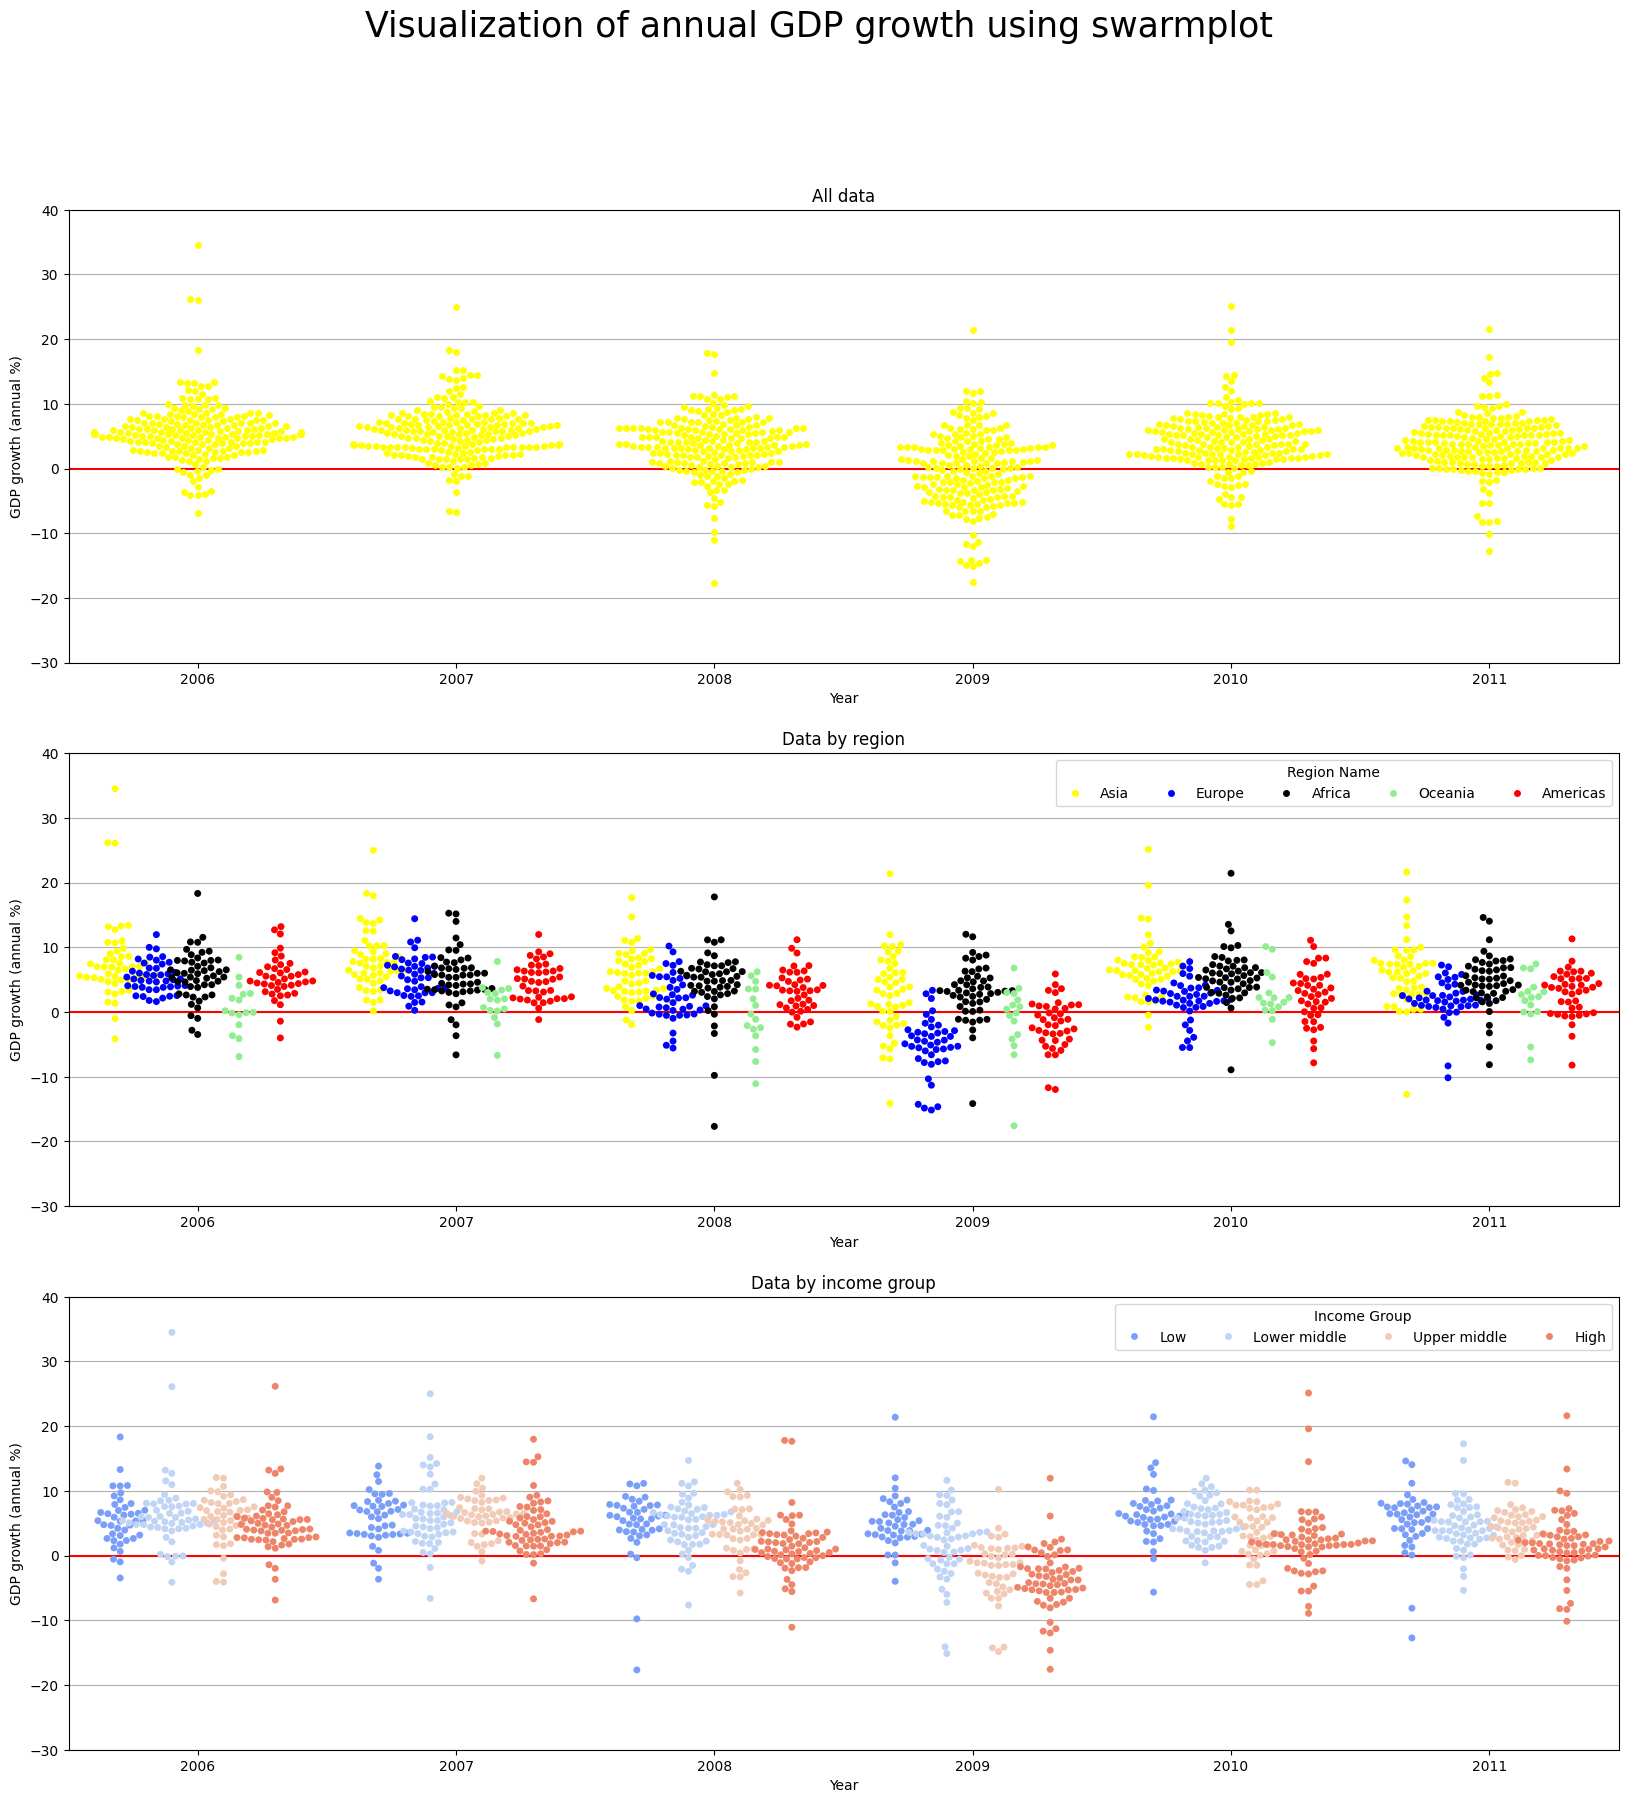

In [28]:
# Swarmplot
fig, ax = plt.subplots(3, 1, figsize=(20,20), facecolor='white')
fig.suptitle('Visualization of annual GDP growth using swarmplot', size=25)

sns.swarmplot(data=recession_data_1, ax=ax[0], color='yellow', dodge=True)
ax[0].grid(True, axis='y')
ax[0].set_ylim([-30, 40])
ax[0].set_title('All data')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GDP growth (annual %)')
ax[0].axhline(y=0, color='red')

melted_data = recession_data_1.melt(id_vars=['Region Name'], value_vars=recession_data_1.columns[3:], var_name='Year', value_name='GDP Growth')
sns.swarmplot(data=melted_data, ax=ax[1], x='Year', y='GDP Growth', hue='Region Name', palette=['yellow', 'blue', 'black', 'lightgreen', 'red'], dodge=True)
ax[1].grid(True, axis='y')
ax[1].set_ylim([-30, 40])
ax[1].set_title('Data by region')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('GDP growth (annual %)')
ax[1].axhline(y=0, color='red')
ax[1].legend(title='Region Name', ncols=5)

melted_data2 = recession_data_1.melt(id_vars=['Income Group'], value_vars=recession_data_1.columns[3:], var_name='Year', value_name='GDP Growth')
sns.swarmplot(data=melted_data2, ax=ax[2], x='Year', y='GDP Growth', hue='Income Group', palette='coolwarm', dodge=True)
ax[2].grid(True, axis='y')
ax[2].set_ylim([-30, 40])
ax[2].set_title('Data by income group')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('GDP growth (annual %)')
ax[2].axhline(y=0, color='red')
ax[2].legend(title='Income Group', ncols=4)

plt.tight_layout
plt.show()

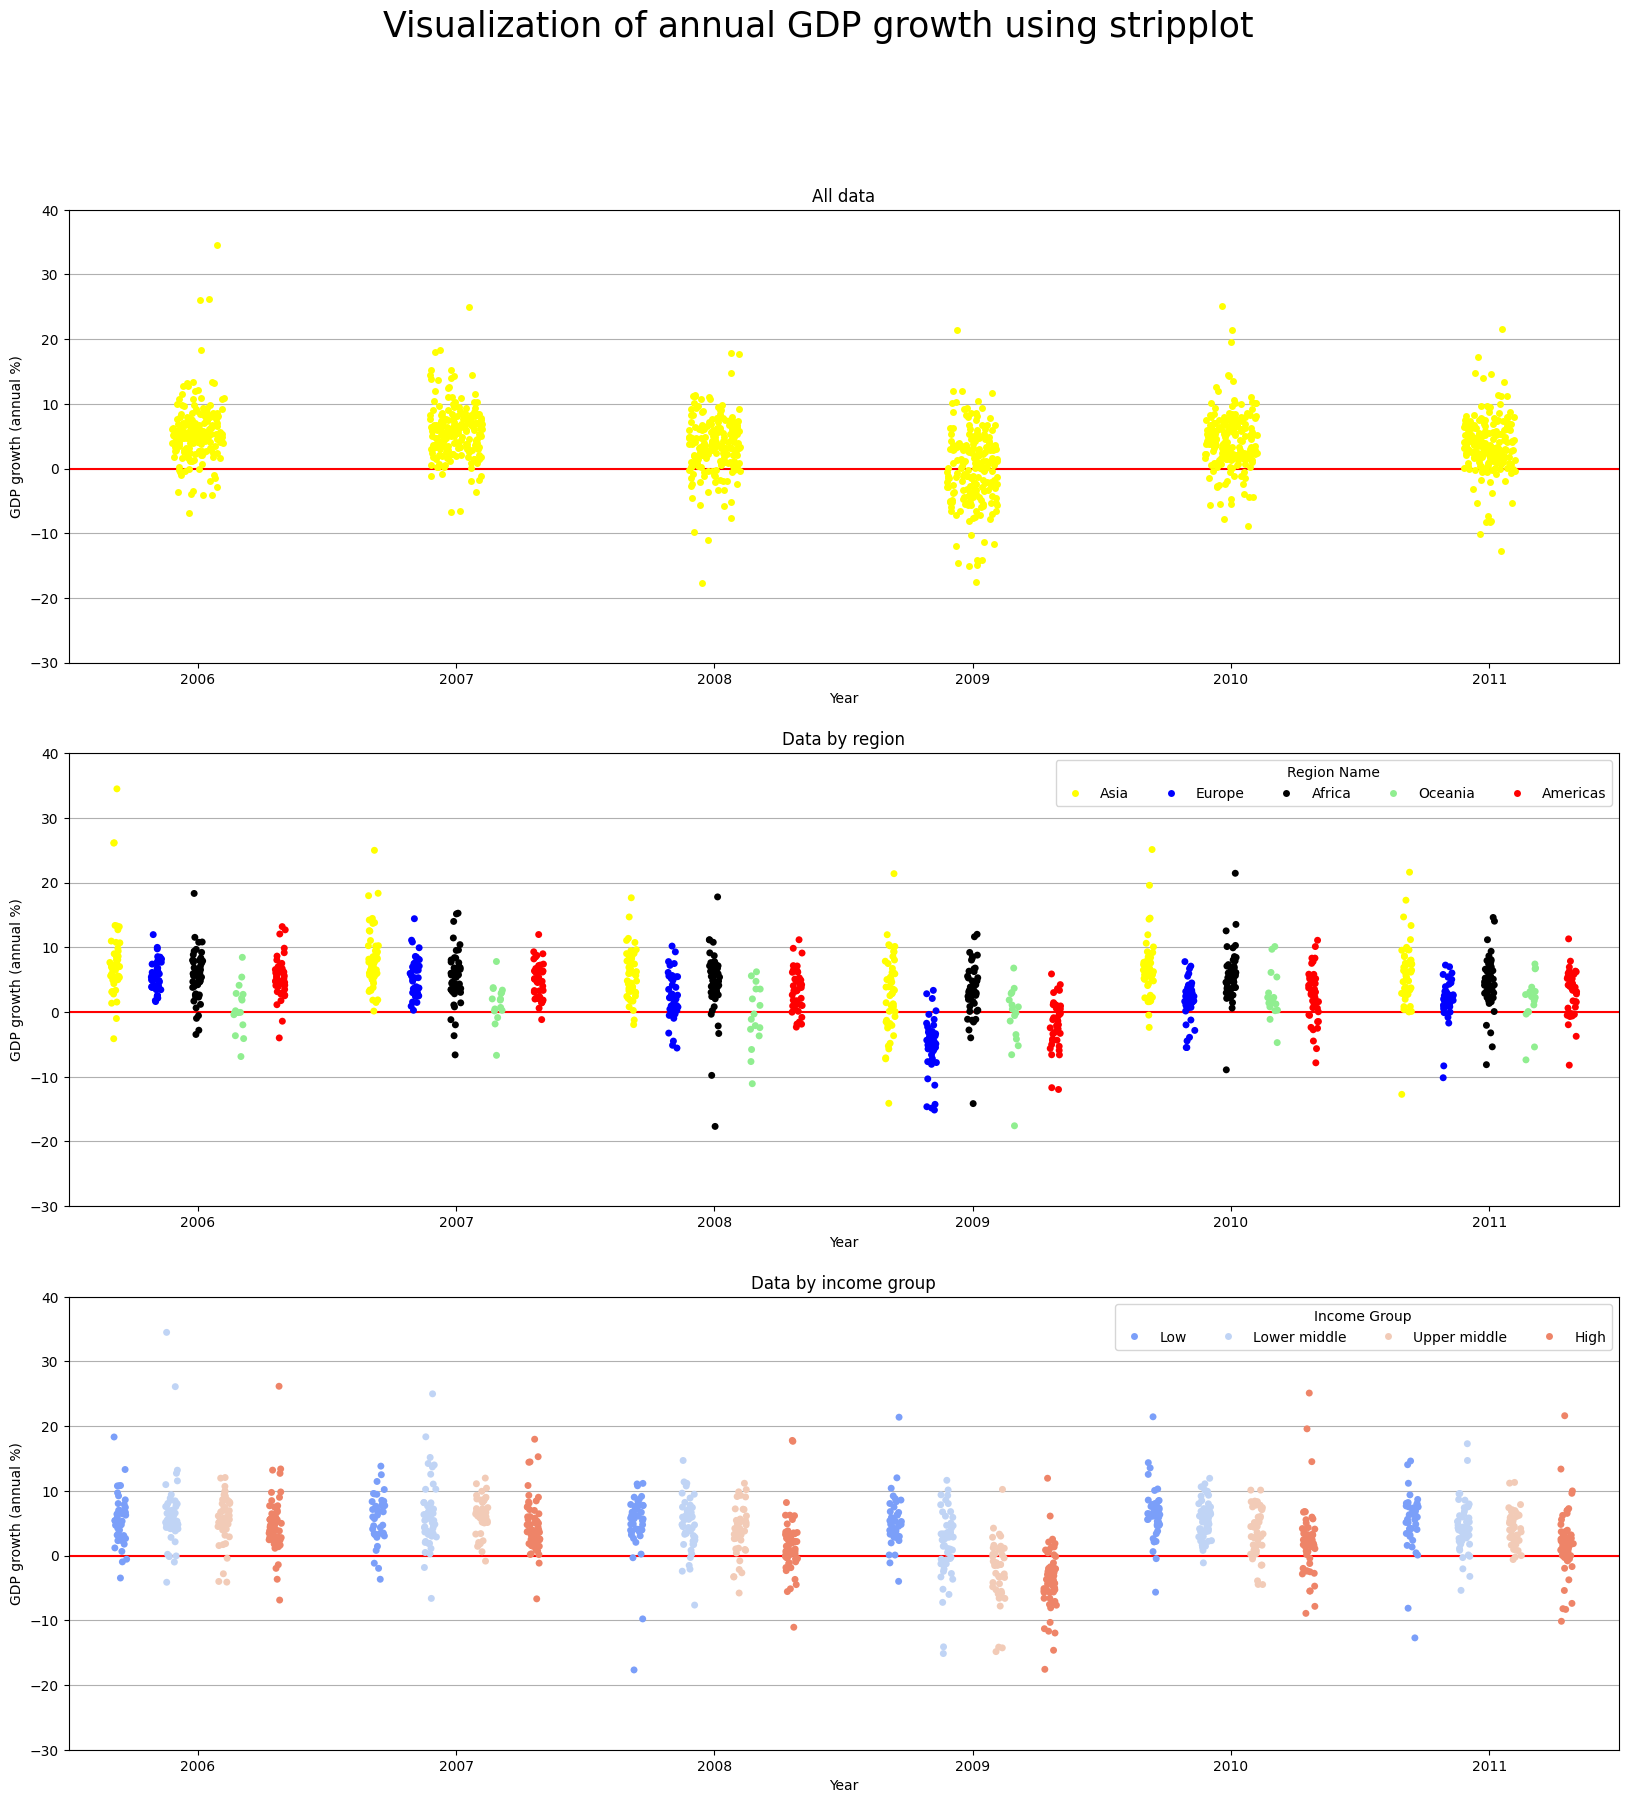

In [29]:
# Stripplot
fig, ax = plt.subplots(3, 1, figsize=(20,20), facecolor='white')
fig.suptitle('Visualization of annual GDP growth using stripplot', size=25)

sns.stripplot(data=recession_data_1, ax=ax[0], color='yellow', dodge=True)
ax[0].grid(True, axis='y')
ax[0].set_ylim([-30, 40])
ax[0].set_title('All data')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GDP growth (annual %)')
ax[0].axhline(y=0, color='red')

melted_data = recession_data_1.melt(id_vars=['Region Name'], value_vars=recession_data_1.columns[3:], var_name='Year', value_name='GDP Growth')
sns.stripplot(data=melted_data, ax=ax[1], x='Year', y='GDP Growth', hue='Region Name', palette=['yellow', 'blue', 'black', 'lightgreen', 'red'], dodge=True)
ax[1].grid(True, axis='y')
ax[1].set_ylim([-30, 40])
ax[1].set_title('Data by region')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('GDP growth (annual %)')
ax[1].axhline(y=0, color='red')
ax[1].legend(title='Region Name', ncols=5)

melted_data2 = recession_data_1.melt(id_vars=['Income Group'], value_vars=recession_data_1.columns[3:], var_name='Year', value_name='GDP Growth')
sns.stripplot(data=melted_data2, ax=ax[2], x='Year', y='GDP Growth', hue='Income Group', palette='coolwarm', dodge=True)
ax[2].grid(True, axis='y')
ax[2].set_ylim([-30, 40])
ax[2].set_title('Data by income group')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('GDP growth (annual %)')
ax[2].axhline(y=0, color='red')
ax[2].legend(title='Income Group', ncols=4)

plt.tight_layout
plt.show()

#### c) Dyskusja wyników

Zastanów się jakie są mocne i słabe strony poszczególnych typów wykresów wykonanych w tym zadaniu. W jakich przypadkach wykorzystanie konkretnych typów wykresów do wizualizacji może sprawiać problemy?

### Boxplot:
- Mocne strony:
    - daje nam informacje o danych jak: mediana, kwartyle, zakres.
    - pozwala zidentyfikować wartości odstająca.
- Słabe strony:
    - nie przedstawia wszystkich punktów.
    - nie pokazuje kształtu rozkładu danych.
 
### Violinplot:
- Mocne strony:
    - pokazuje kształt rozkładu danych.
- Słabe strony:
    - cięzki do interpretacji.
 
### Swarmplot:
- Mocne strony:
    - przedstawia wszystkie punkt z danych.
    - pokazuje zagęszczenia punktów.
- Słabe strony
    - punkty mogą nachodzić na siebie np. gdy punktów jest bardzo dużo.
 
### Stripplot:
- Mocne strony:
    - przedstawia wszystkie punkt z danych - tak jak swarmplot.
    - prosty w interpretacji
- Słabe strony:
    - punkty mogą nachodzić na siebie np. gdy punktów jest bardzo dużo - tak jak swarmplot.
    - nie pokazuje zagęszczenia punktów danych.
 
W przypadku gdy mamy doczynienia z dużą liczbą punktów swarmplot oraz stripplot będą trudne do interpretacji przez nachodzące na siebie punkty.
Jednak gdy chcemy mieć dokładnie zobrazowany każdy punkt będą one lepsze od boxplot i violinplot.